In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
congresspeople = pd.read_csv('congress_severability.csv')
congresspeople.head()

,username,Severable Component @ t = 1,Severability @ t = 1,Severable Component @ t = 2,Severability @ t = 2,Severable Component @ t = 3,Severability @ t = 3,Severable Component @ t = 4,Severability @ t = 4,Severable Component @ t = 5,Severability @ t = 5
0,SenatorBaldwin,"[0, 47, 1, 14, 11, 15, 12, 6, 64, 9, 24, 4, 25...",0.469290,"[0, 6, 12, 14, 15, 1, 3, 164, 47, 13, 64, 7, 4...",0.516892,"[0, 6, 14, 12, 61, 1, 75, 64, 9, 10, 15, 24, 2...",0.490340,"[0, 6, 1, 14, 12, 61, 75, 64, 41, 10, 15, 7, 9...",0.496530,"[0, 6, 1, 14, 12, 61, 75, 207, 145, 78, 181, 1...",0.497355
1,SenJohnBarrasso,"[29, 7, 15, 165, 61, 9, 27, 125, 4, 1, 74, 28,...",0.469901,"[1, 8, 26, 5, 25, 229, 72, 7, 6, 15, 28, 14, 6...",0.523837,"[1, 25, 0, 64, 75, 7, 24, 9, 39, 12, 14, 6, 15...",0.490286,"[1, 72, 25, 0, 12, 41, 64, 7, 14, 75, 9, 15, 2...",0.496530,"[1, 72, 25, 261, 0, 14, 12, 6, 24, 7, 39, 64, ...",0.498616
2,SenatorBennet,"[2, 59, 50, 30]",0.518889,"[2, 59, 50, 30, 201, 342, 439, 5, 345, 389, 17...",0.490862,"[2, 59, 50, 30, 386, 253, 4, 3, 187, 226, 124,...",0.479445,"[2, 59, 50, 30, 386, 467, 253, 246, 4, 3, 124,...",0.486457,"[2, 59, 50, 30, 386, 307, 270, 8, 181, 372, 28...",0.491279
3,MarshaBlackburn,"[3, 66, 70]",0.521003,"[3, 66, 47, 229, 30, 48, 180, 112, 11, 45, 24,...",0.517417,"[3, 66, 70, 60, 441, 110, 105, 245, 8, 246, 36...",0.468132,"[3, 66, 70, 441, 60, 110, 105, 245, 363, 387, ...",0.481655,"[3, 66, 70, 441, 60, 110, 105, 8, 440, 246, 38...",0.487953
4,SenBlumenthal,"[4, 25, 74, 125, 72, 9]",0.452261,"[4, 24, 9, 47, 7, 23, 61, 12, 1, 75, 72, 64, 0...",0.523837,"[4, 24, 20, 9, 47, 10, 7, 1, 64, 72, 25, 12, 1...",0.510462,"[4, 24, 20, 83, 89, 9, 88, 170, 41, 64, 10, 47...",0.493798,"[4, 24, 20, 83, 90, 89, 88, 9, 191, 170, 121, ...",0.497080


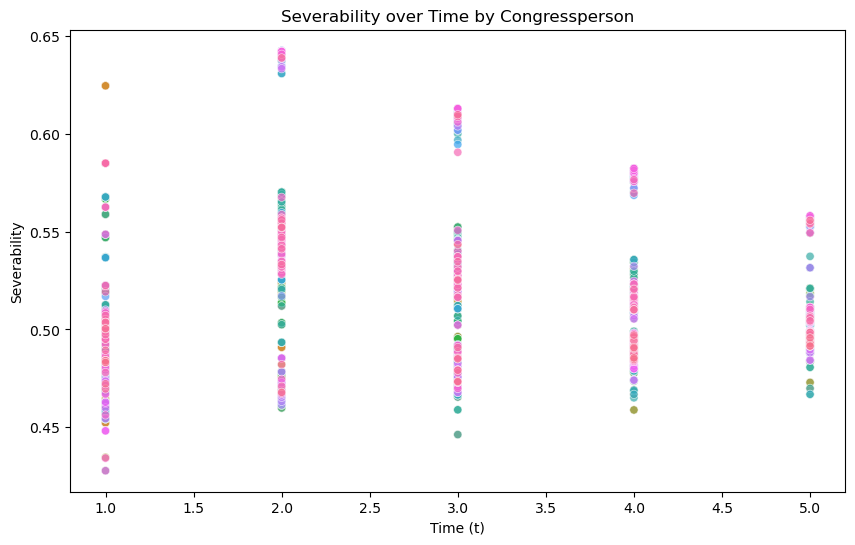

In [40]:
# Melt the DataFrame to long format for plotting
severability_long = congresspeople.melt(
    id_vars=['username'], 
    value_vars=[f'Severability @ t = {i}' for i in range(1, 6)],
    var_name='Time', 
    value_name='Severability'
)

# Convert 'Time' to numeric
severability_long['Time'] = severability_long['Time'].str.get(-1).astype(int)

severability_long.replace(0, np.nan, inplace=True)  # Replace 0 with NaN for better visualization

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=severability_long, 
    x='Time', 
    y='Severability',
    hue='username', 
    legend=False,  # Hide legend if too many lines
    alpha=0.7
)
plt.title('Severability over Time by Congressperson')
plt.xlabel('Time (t)')
plt.ylabel('Severability')
plt.show()

In [45]:
def jaccard(set1, set2):
    """Calculate the Jaccard similarity between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0

n = congresspeople.shape[0]
jac_congress = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for t in range(1, 6):
            set1 = set(congresspeople.loc[i, f'Severable Component @ t = {t}'])
            set2 = set(congresspeople.loc[j, f'Severable Component @ t = {t}'])
            jac_congress[i, j] += jaccard(set1, set2)
        jac_congress[i, j] /= 5

jac_congress

array([[1.        , 0.98461538, 0.87142857, ..., 0.77032967, 0.15238095,
        0.79047619],
       [0.98461538, 1.        , 0.88571429, ..., 0.78571429, 0.14981685,
        0.78791209],
       [0.87142857, 0.88571429, 1.        , ..., 0.72857143, 0.15873016,
        0.74285714],
       ...,
       [0.77032967, 0.78571429, 0.72857143, ..., 1.        , 0.31868132,
        0.63076923],
       [0.15238095, 0.14981685, 0.15873016, ..., 0.31868132, 1.        ,
        0.31648352],
       [0.79047619, 0.78791209, 0.74285714, ..., 0.63076923, 0.31648352,
        1.        ]])

In [65]:
mean_jaccard = np.mean(jac_congress, axis=1)  # Mean Jaccard similarity for each congressperson

usernames_to_mean_jaccard = {
    congresspeople.loc[i, 'username']: mean_jaccard[i] for i in range(n)
}

print("Top 10 Congresspeople by Mean Jaccard Similarity:")
top_10_jaccard = sorted(usernames_to_mean_jaccard.items(), key=lambda x: x[1], reverse=True)[:10]
for username, mean_jaccard in top_10_jaccard:
    print(f"{username}: {mean_jaccard:.4f}")

print("\nBottom 10 Congresspeople by Mean Jaccard Similarity:")
bottom_10_jaccard = sorted(usernames_to_mean_jaccard.items(), key=lambda x: x[1])[:10]
for username, mean_jaccard in bottom_10_jaccard:
    print(f"{username}: {mean_jaccard:.4f}")

Top 10 Congresspeople by Mean Jaccard Similarity:
SenatorCardin: 0.9185
ChrisCoons: 0.9185
SenCortezMasto: 0.9185
SenTomCotton: 0.9185
SenKevinCramer: 0.9185
SenDuckworth: 0.9185
SenJoniErnst: 0.9185
LindseyGrahamSC: 0.9185
SenatorHagerty: 0.9185
SenatorHassan: 0.9185

Bottom 10 Congresspeople by Mean Jaccard Similarity:
repdinatitus: 0.1984
RepWilson: 0.1984
RepJohnYarmuth: 0.1984
RepDavidRouzer: 0.3176
RepSusanWild: 0.3182
USRepGaryPalmer: 0.3285
RepMarkTakano: 0.3285
RepJoeWilson: 0.3285
JohnCornyn: 0.4390
RepChrisPappas: 0.4547
